## Link --> https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

`Content`

This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

* ID: The title ID on JustWatch.
* title: The name of the title.
* show type: TV show or movie.
* description: A brief description.
* release year: The release year.
* age certification: The age certification.
* runtime: The length of the episode (SHOW) or movie.
* genres: A list of genres.
* production countries: A list of countries that produced the title.
* seasons: Number of seasons if it's a SHOW.
* IMDB ID: The title ID on IMDB.
* IMDB Score: Score on IMDB.
* IMDB Votes: Votes on IMDB.
* TMDB Popularity: Popularity on TMDB.
* TMDB Score: Score on TMDB.

And over +77k credits of actors and directors on Netflix titles with 5 columns containing their information, including:

* person ID: The person ID on JustWatch.
* ID: The title ID on JustWatch.
* name: The actor or director's name.
* character name: The character name.
* role: ACTOR or DIRECTOR.

`Tasks`
* Developing a content-based recommender system using the genres and/or descriptions.
* Identifying the main content available on the streaming.
* Network analysis on the cast of the titles.
* Exploratory data analysis to find interesting insights.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credits = pd.read_csv("Credits.csv")

In [3]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [4]:
titles = pd.read_csv("titles.csv")

In [67]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [5]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [6]:
credits.isnull().sum()

person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

In [7]:
name = credits['name'].unique()

In [8]:
credits['name'].value_counts()

Shah Rukh Khan         30
Anupam Kher            25
Boman Irani            25
Kareena Kapoor Khan    25
Paresh Rawal           22
                       ..
Jacky Cai               1
Jan Tse                 1
Tsui Ching-Man          1
Sam Chan Yu-Sum         1
Yemi Amodu              1
Name: name, Length: 53687, dtype: int64

In [9]:
credits[credits['name'] == 'Shah Rukh Khan']

,person_id,id,name,character,role
3900,38632,tm67635,Shah Rukh Khan,Rahul Khanna,ACTOR
3957,38632,tm55100,Shah Rukh Khan,Amarkanth Varma,ACTOR
4043,38632,tm8859,Shah Rukh Khan,Hero,ACTOR
4102,38632,tm12482,Shah Rukh Khan,Ram Jaane,ACTOR
4112,38632,tm128925,Shah Rukh Khan,Sunder Srivastava,ACTOR
4177,38632,tm184502,Shah Rukh Khan,Sunil,ACTOR
4202,38632,tm27601,Shah Rukh Khan,Ajay Bakshi,ACTOR
4246,38632,tm105716,Shah Rukh Khan,Roop Singh Rathod,ACTOR
4278,38632,tm189773,Shah Rukh Khan,Lalit,ACTOR
4301,38632,tm58893,Shah Rukh Khan,Bablu Chaudhary / Manu Dada,ACTOR


In [10]:
credits['role'].unique()

array(['ACTOR', 'DIRECTOR'], dtype=object)

In [11]:
dicrector = credits[credits['role'] == 'DIRECTOR']

In [12]:
dicrector

,person_id,id,name,character,role
36,3308,tm84618,Martin Scorsese,NaN,DIRECTOR
83,11475,tm127384,Terry Jones,NaN,DIRECTOR
84,11473,tm127384,Terry Gilliam,NaN,DIRECTOR
106,11475,tm70993,Terry Jones,NaN,DIRECTOR
148,14255,tm190788,William Friedkin,NaN,DIRECTOR
...,...,...,...,...,...
77172,1790433,tm1040816,Easy Ferrer,NaN,DIRECTOR
77184,1962840,tm1014599,Seyi Babatope,NaN,DIRECTOR
77186,1278319,tm1108171,Kürşad Bayhan,NaN,DIRECTOR
77197,363804,tm1045018,Pascal Atuma,NaN,DIRECTOR


In [13]:
actor = credits[credits['role'] == 'ACTOR']

In [14]:
actor

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...
77207,2050257,tm1098060,Pa Jimi Solanke,Akanji's Father,ACTOR
77208,1347054,tm1098060,Nnenna Rachael Okonkwo,Afinni,ACTOR
77209,157590,tm1098060,Lucien Morgan,Dr. Ian Stones,ACTOR
77210,129059,tm1098060,Magdalena Korpas,Jane,ACTOR


In [18]:
name = credits.name.value_counts().index

In [19]:
appered = credits.name.value_counts().values

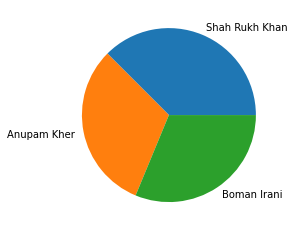

In [29]:
plt.pie(appered[:3], labels=name[:3]);

In [34]:
credits[ credits['id'] == 'tm84618']  

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
5,32267,tm84618,Peter Boyle,Wizard,ACTOR
6,519612,tm84618,Leonard Harris,Senator Charles Palantine,ACTOR
7,29068,tm84618,Diahnne Abbott,Concession Girl,ACTOR
8,519613,tm84618,Gino Ardito,Policeman at Rally,ACTOR
9,3308,tm84618,Martin Scorsese,Passenger Watching Silhouette,ACTOR


In [35]:
credits[ credits['id'] == 'tm127384'] 

,person_id,id,name,character,role
37,11472,tm127384,Graham Chapman,King Arthur / Voice of God / Middle Head / Hic...,ACTOR
38,1549,tm127384,John Cleese,Second Swallow-Savvy Guard / The Black Knight ...,ACTOR
39,11474,tm127384,Eric Idle,Dead Collector / Peasant 1 / Sir Robin the Not...,ACTOR
40,11473,tm127384,Terry Gilliam,Patsy / Green Knight / Old Man from Scene 24 (...,ACTOR
41,11475,tm127384,Terry Jones,Dennis's Mother / Sir Bedevere / Left Head / P...,ACTOR
42,11476,tm127384,Michael Palin,First Swallow-Savvy Guard / Dennis / Peasant 2...,ACTOR
43,40898,tm127384,Connie Booth,The Witch,ACTOR
44,11478,tm127384,Carol Cleveland,Zoot / Dingo,ACTOR
45,11482,tm127384,Neil Innes,First Monk / Singing Minstrel / Page Crushed b...,ACTOR
46,40899,tm127384,Bee Duffell,Old Crone,ACTOR


In [59]:
titles[titles['id'] == "tm127384"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8


In [44]:
credits['id'].value_counts().index

Index(['tm32982', 'tm244149', 'tm84613', 'tm467467', 'tm158304', 'tm176528',
       'tm979026', 'tm60292', 'tm41792', 'tm24088',
       ...
       'ts255779', 'ts320502', 'tm428597', 'ts293814', 'ts223062', 'tm324806',
       'tm21911', 'tm348919', 'ts343426', 'ts216698'],
      dtype='object', length=5434)

In [43]:
credits['id'].value_counts().values

array([208, 174, 150, ...,   1,   1,   1], dtype=int64)

In [103]:
titles.genres.value_counts().index

Index(['['comedy']', '['drama']', '['documentation']', '['comedy', 'drama']',
       '['drama', 'comedy']', '['reality']', '['drama', 'romance']',
       '['comedy', 'documentation']', '['animation']', '[]',
       ...
       '['action', 'animation', 'family', 'scifi']',
       '['reality', 'documentation', 'comedy']',
       '['drama', 'thriller', 'reality']',
       '['documentation', 'drama', 'european']',
       '['comedy', 'romance', 'thriller']',
       '['drama', 'family', 'comedy', 'music']',
       '['drama', 'thriller', 'western']',
       '['comedy', 'thriller', 'drama', 'action', 'crime']',
       '['romance', 'drama', 'history', 'european']',
       '['family', 'comedy', 'animation']'],
      dtype='object', length=1626)

In [97]:
titles.genres.value_counts().values

array([510, 350, 320, ...,   1,   1,   1], dtype=int64)

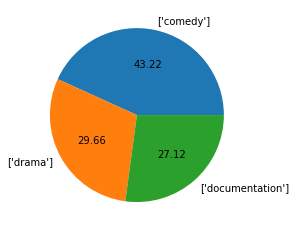

In [72]:
plt.pie(titles.genres.value_counts().values[:3], labels=titles.genres.value_counts().index[:3], autopct='%.2f');

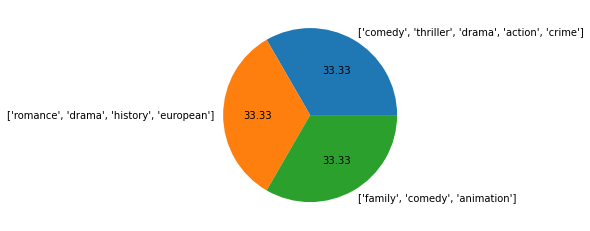

In [91]:
plt.pie(titles.genres.value_counts().values[-3:], labels=titles.genres.value_counts().index[-3:], autopct='%.2f');

<AxesSubplot:>

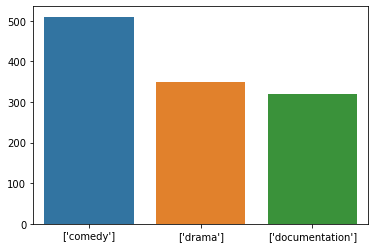

In [76]:
sns.barplot(x = titles.genres.value_counts().index[:3], y = titles.genres.value_counts().values[:3])